<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> A sneak peek at Scientific Computing </h3> 
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.01 </h2>
</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/tclaudioe/Scientific-Computing-V3/blob/main/Bonus%20-%20current/Bonus%20-%20000%20-%20A%20sneak%20peek%20at%20Scientific%20Computing.ipynb)

## Checking some libraries dependencies

In [55]:
import importlib.util
import sys
import subprocess

##########################
# CoLab requirements
# https://stackoverflow.com/questions/44210656/how-to-check-if-a-module-is-installed-in-python-and-if-not-install-it-within-t
##########################
    
# install_colab_requirements 
libraries = ['numpy', 'scipy', 'matplotlib', 'colorama', 
            'bitstring', 'sympy', 'ipywidgets','pandas']

for library in libraries:
    # Check if the library is already installed
    if importlib.util.find_spec(library) is not None:
        print(f"{library} is already installed.")
    else:
        print(f"{library} is not installed. Installing...")
        # Install the library using pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", library])
        print(f"{library} has been installed.")

numpy is already installed.
scipy is already installed.
matplotlib is already installed.
colorama is already installed.
bitstring is already installed.
sympy is already installed.
ipywidgets is already installed.
pandas is already installed.


## Importing the required libraries

In [56]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sympy as sym # type: ignore
from sympy.interactive import init_printing
init_printing(use_latex=True, pretty_print=True,order='lex') # type: ignore
from sympy import cos, sin, latex, Eq, Add, Mul, Pow # type: ignore
from matplotlib.patches import Wedge, Rectangle # type: ignore
from ipywidgets import widgets, interact, fixed, interactive, HBox, VBox, Layout # type: ignore
from scipy import optimize, integrate # type: ignore
from scipy.interpolate import BarycentricInterpolator
from scipy.integrate import solve_ivp
import pandas as pd

##############################################################################
# Certain characters require special escaping in TeX, such as: $ % & ~ ^ \ { } \( \) \[ \]
# https://stackoverflow.com/questions/65426069/use-of-mathbb-in-matplotlib
import matplotlib 
FS = 20
matplotlib.rc('xtick', labelsize=FS)
matplotlib.rc('ytick', labelsize=FS)
plt.rcParams.update({
    'font.size': FS,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
##############################################################################
from colorama import Fore, Back, Style # type: ignore
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL
textBold = lambda x: Style.BRIGHT+x+Style.RESET_ALL
textBoldH = lambda x: Style.BRIGHT+Back.YELLOW+x+Style.RESET_ALL

# This put the controls in a row when we have too many
def interact_row(func, **kwargs):
    widget = interactive(func, **kwargs)
    controls = HBox(widget.children[:-1], layout=Layout(flex_flow='row wrap'))
    output = widget.children[-1]
    display(VBox([controls, output]))  

# This is the length use in figsize
fig_size_length = 8

# A story of some trigonometric functions: how to handle high level functions by only using **elementals operations** ($\oplus$, $\ominus$, $\otimes$, and $\oslash$) and the implications of the approximations

In this jupyter notebook we will quickly review several aspects we will study in the course called _Scientific Computing_.

The story we will tell you will be connected to the computation of the trigonemetric **functions** $\sin(x)$ and $\cos(x)$ for $x\in[0,2\,\pi]$.

The outline is the following:
1. What is the traditional presentation of the $\sin(x)$ and $\cos(x)$ functions?
1. First attempt: Recalling the very useful Taylor's series expansion to approximate a function about a point $x_0$
1. Simple and advance computations with the **functions**: Cancelation errors
1. What else can I do with these trigonemetric functions? Find a root numerically!
1. Is there another way to build the trigonometric functions $\verb|sin(x)|$ and $\verb|cos(x)|$ using **elementals operations** ($\oplus$, $\ominus$, $\otimes$, and $\oslash$)? **An piecewise linear interpolation approach**
1. Building the polynomial interpolation by means of solving a linear system of equations? It requires to know the values of $\sin(x)$ and $\cos(x)$ at certain points
1. Adjusting a periodic but noisy signal
1. Integrating numerically functions that don't have anti-derivative using only **elementals operations**
1. Finally, getting the approximated values of $\sin(x)$ and $\cos(x)$ using ODEs!


# What is the traditional presentation of the $\sin(x)$ and $\cos(x)$ functions?

In [81]:
def only_circle_plot(x,theta_inf=0.,theta_sup=2*np.pi,input_sin=np.sin,input_cos=np.cos):
        eps = 0.1
        theta = np.linspace(theta_inf, theta_sup, 400)
        plt.title(r'$\textrm{Circle with radius 1}$', fontsize=FS)

        # Plotting a circle with radius 1 centered at the origin
        plt.plot(input_cos(theta), input_sin(theta), '-', color='blue')
        plt.grid(True)
        plt.axis((-1.5, 1.5, -1.5, 1.5))

        # cos
        plt.plot([0, input_cos(x)], [0, 0], 'm--', linewidth=2)
        if input_cos(x)/2<=1.5 or input_cos(x)/2>=-1.5: 
            plt.text(input_cos(x)/2, -eps/2, r'$\cos(x)$', fontsize=15, ha='center', va='top',color='magenta')

        # sin
        plt.plot([input_cos(x), input_cos(x)], [0, input_sin(x)], 'g--', linewidth=2)
        if (input_sin(x)/2<=1.5 or input_sin(x)/2>=-1.5) and (input_cos(x)/2<=1.5 or input_cos(x)/2>=-1.5):
            plt.text(input_cos(x)+eps, input_sin(x)/2, r'$\sin(x)$', fontsize=15, ha='left', va='center', color='green')

        # Plotting angle
        theta_x = np.linspace(0, x, 100)
        plt.plot(0.3*input_cos(theta_x), 0.3*input_sin(theta_x), 'k-')
        plt.text(0.15*input_cos(x/2), 0.15*input_sin(x/2), r'$x$', fontsize=15, ha='center', va='center')
        
        # Plotting the point on the circle at angle x
        plt.plot([0, input_cos(x)], [0, input_sin(x)], '-', color='red', linewidth=2)
        plt.plot(input_cos(x), input_sin(x), 'o', color='black', markersize=10)
        
def plot_circle(x,show_more=False): 
    theta = np.linspace(0, 2*np.pi, 100) 
    plt.figure(figsize=(fig_size_length, fig_size_length))
    
    if not show_more:
        only_circle_plot(x)
    else:
        ##############################################################################
        plt.subplot(221)
        only_circle_plot(x)
        ##############################################################################
        plt.subplot(222)
        plt.plot(theta, np.sin(theta), 'g-', label=r'$\sin(\theta)$')
        # plt.title(r'$\sin(\theta)$', fontsize=FS)
        plt.legend(loc='best')
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.xlabel(r'$\theta$', fontsize=FS)
        plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
        plt.vlines(x, -1, 1, color='red', linestyle='-', linewidth=2)
        plt.text(x+0.1, -1, r'$x$', fontsize=20, ha='left', va='bottom')
        plt.plot(x, np.sin(x), 'o', color='black', markersize=10)
        plt.ylim(-1.5,1.5)
        plt.grid(True)
        
        ##############################################################################
        plt.subplot(223)
        plt.plot(np.cos(theta), theta, 'm-', label=r'$\cos(\theta)$')
        # plt.title(r'$\cos(\theta)$', fontsize=FS)
        plt.legend(loc='best')
        # plt.yticks(fontsize=15)
        plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
        plt.xticks(fontsize=15)
        plt.ylabel(r'$\theta$', fontsize=FS)
        plt.hlines(x, -1, 1, color='red', linestyle='-', linewidth=2)
        plt.text(1+0.1,x+0.1, r'$x$', fontsize=20, ha='center', va='center')
        plt.plot(np.cos(x), x, 'o', color='black', markersize=10)
        plt.xlim(-1.5,1.5)
        plt.grid(True)
        
        ##############################################################################
        plt.subplot(224)
        plt.plot(theta, np.cos(theta), 'm-', label=r'$\cos(\theta)$')
        plt.plot(theta, np.sin(theta), 'g-', label=r'$\sin(\theta)$')
        plt.legend(loc='upper right', fontsize=FS, bbox_to_anchor=(1.75, 0.5))
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.xlabel(r'$\theta$', fontsize=FS)
        plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
        plt.vlines(x, -1, 1, color='red', linestyle='-', linewidth=2)
        plt.text(x+0.1, -1, r'$x$', fontsize=20, ha='left', va='bottom')
        plt.grid(True)
        
    ##############################################################################
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()
    ##############################################################################

In [82]:
x_widget = widgets.FloatSlider(min=0, max=2*np.pi, step=0.05, value=np.pi/4)
interact(plot_circle, x=x_widget, show_more=False, input_cos=fixed(np.cos), input_sin=fixed(np.sin))

interactive(children=(FloatSlider(value=0.7853981633974483, description='x', max=6.283185307179586, step=0.05)…

<function __main__.plot_circle(x, show_more=False)>

# First attempt: Recalling the very useful Taylor's series expansion to approximate a function about a point $x_0$

Taylor series of f(x) around x0 up to order n with the residue:


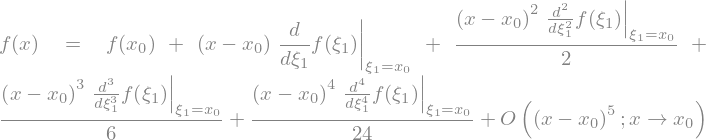

Taylor series of f(x) around x0 up to order WITHOUT the residue:


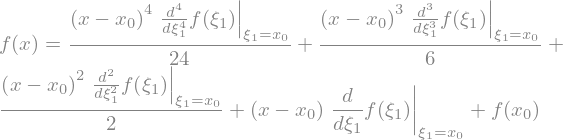

In [83]:
def show_taylor_series_example():
    x =sym.symbols('x')
    x0 =sym.symbols('x0')
    f = sym.Function('f', real=True)
    n = 5
    f_Taylor_n=sym.series(f(x), x, x0, n)
    print(textBoldH('Taylor series of f(x) around x0 up to order n with the residue:'))
    display(Eq(f(x), f_Taylor_n, evaluate=False))
    print(textBoldH('Taylor series of f(x) around x0 up to order')+textBold(' WITHOUT ')+textBoldH('the residue:'))
    display(Eq(f(x), f_Taylor_n.removeO(),evaluate=False))

show_taylor_series_example()

In [84]:
def show_Taylor_expansion(n=1,x00=0.0, show_explicit=False, x_left=-2*np.pi, x_right=4*np.pi,x_value=np.pi/4):
    x =sym.symbols('x')
    x0 =sym.symbols('x0')
    sin_Taylor_n=sym.series(sym.sin(x), x, x0, n).removeO()
    cos_Taylor_n=sym.series(sym.cos(x), x, x0, n).removeO()
    sin_Taylor_n_numpy = np.vectorize(sym.lambdify([x,x0], sin_Taylor_n))
    cos_Taylor_n_numpy = np.vectorize(sym.lambdify([x,x0], cos_Taylor_n))

    plt.figure(figsize=(fig_size_length, fig_size_length))
    ######################################################################################
    xx = np.linspace(0, 2*np.pi, 100)
    plt.subplot(221)
    if n<=10:
        if show_explicit:
            plt.plot(xx, sin_Taylor_n_numpy(xx,x00), label=r'$'+latex(sym.N(sin_Taylor_n.evalf(subs={x0: x00}),3))+'$', color='blue', linestyle='--')
            plt.plot(xx, cos_Taylor_n_numpy(xx,x00), label=r'$'+latex(sym.N(cos_Taylor_n.evalf(subs={x0: x00}),3))+'$', color='red', linestyle='--') 
        else:
            plt.plot(xx, sin_Taylor_n_numpy(xx,x00), label=r'$'+latex(sin_Taylor_n)+'$', color='blue', linestyle='--')
            plt.plot(xx, cos_Taylor_n_numpy(xx,x00), label=r'$'+latex(cos_Taylor_n)+'$', color='red', linestyle='--')
    else:
        plt.plot(xx, sin_Taylor_n_numpy(xx,x00), label=r'Taylor expansion of $\sin(x)$', color='blue', linestyle='--')
        plt.plot(xx, cos_Taylor_n_numpy(xx,x00), label=r'Taylor expansion of $\cos(x)$', color='red', linestyle='--') 

    plt.plot(xx, np.sin(xx), label=r'$\sin(x)$', color='green', alpha=0.8)
    plt.plot(xx, np.cos(xx), label=r'$\cos(x)$', color='magenta',alpha=0.8)

    
    plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
    plt.title(r'$\textrm{Looking at the Taylor}$'+'\n'+r'$\textrm{expansion of }\sin(x)\textrm{ and }\cos(x)$',fontsize=16)
    plt.vlines(x00, -1, 1.5, color='orange', linestyle='--', linewidth=2, label=r"$\textrm{Center of Taylor's series expansion}$")
    plt.text(x00, -1.2, r'$x_0$', fontsize=FS, ha='center', va='center')
    plt.text(3*np.pi/2,1.2, r'$n='+str(n)+'$', fontsize=FS, ha='center', va='center')
    
    plt.ylim(-1.5, 1.5)
    plt.xlim(-0.4, 2*np.pi+0.4)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
    ######################################################################################
    plt.subplot(223)
    xx = np.linspace(-2*np.pi, 4*np.pi, 600)
    
    plt.plot(xx, sin_Taylor_n_numpy(xx,x00), color='blue', linestyle='--')
    plt.plot(xx, cos_Taylor_n_numpy(xx,x00), color='red', linestyle='--')

    plt.plot(xx, np.sin(xx), label=r'$\sin(x)$', color='green', alpha=0.8)
    plt.plot(xx, np.cos(xx), label=r'$\cos(x)$', color='magenta',alpha=0.8)

    plt.ylim(np.min([-1.5,np.min(sin_Taylor_n_numpy(xx,x00)),np.min(cos_Taylor_n_numpy(xx,x00))]), 
             np.max([1.5,np.max(sin_Taylor_n_numpy(xx,x00)),np.max(cos_Taylor_n_numpy(xx,x00))]))
    plt.grid(True)
    plt.xticks(np.arange(-2*np.pi, 4*np.pi+0.1, 2*np.pi),
                [r'$-2\pi$', r'$0$', r'$2\pi$', r'$4\pi$'], fontsize=FS)
    plt.title(r'$\textrm{Wider domain of previous}$'+'\n'+r'$\textrm{defined functions}$',fontsize=16)
    plt.vlines(x00, -1, 1.5, color='orange', linestyle='--', linewidth=2)
    plt.text(x00, -1.2, r'$x_0$', fontsize=FS, ha='center', va='center')
    
    rectangle=Rectangle((-0.4, -1.5), 2*np.pi+0.8, 3, edgecolor='k', facecolor='none', linewidth=2,alpha=0.8)
    plt.gca().add_patch(rectangle)
    
    plt.xlim(np.min([x_left,x_right]), np.max([x_left,x_right]))
    ###################################################################################### 
    plt.subplot(224)
    only_circle_plot(x_value, theta_inf=-2*np.pi, theta_sup=4*np.pi, 
                     input_sin=lambda z: sin_Taylor_n_numpy(z,x00),
                     input_cos=lambda z: cos_Taylor_n_numpy(z,x00))
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [ ]:
interact_row(show_Taylor_expansion, n=widgets.IntSlider(min=1, max=100, step=1, value=0), 
         x00=widgets.FloatSlider(min=-2*np.pi, max=4*np.pi, step=6*np.pi/300, value=np.pi/2,description='x0'),
         show_explicit=widgets.Checkbox(value=False, description='Show explicit Taylor expansion'),
         x_left=widgets.FloatSlider(min=-2*np.pi, max=4*np.pi, step=6*np.pi/300, value=-2*np.pi, description='x_left'),
         x_right=widgets.FloatSlider(min=-2*np.pi, max=4*np.pi, step=6*np.pi/300, value=4*np.pi, description='x_right'),
         x_value=widgets.FloatSlider(min=-2*np.pi, max=4*np.pi, step=6*np.pi/300, value=np.pi/4, description='x'))

# Simple and advance computations with the **functions**: Cancelation errors

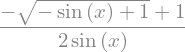

In [86]:
def show_example_function(show=True):
    x = sym.symbols('x')
    f = (1 - sym.sqrt(1 - sym.sin(x)))/(2 * sym.sin(x)) # type: ignore
    if show:
        display(f)
    return x, f

show_example_function();

In [ ]:
def show_evaluation_example_function(n_min=-100,log2_x_hat=-10):
    plt.figure(figsize=(fig_size_length/2, fig_size_length/2))
    x, f = show_example_function(show=False)
    f_numpy = sym.lambdify(x, f, modules='numpy') # type: ignore
    x_vals = np.logspace(n_min, 0, 1-n_min, base=2)
    plt.loglog(x_vals, f_numpy(x_vals), 'd', label=r'$f(x)=\displaystyle\frac{1-\sqrt{1-\sin(x)}}{2\,\sin(x)}$', color='red', base=2, alpha=0.5)
    plt.grid(True)
    plt.ylim(2**-3, 1)
    plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
    plt.xlabel(r'$x$', fontsize=FS)
    plt.vlines(np.power(2.,log2_x_hat),np.power(2.,-2.5), np.power(2.,0), color='orange', linestyle='--', linewidth=2)
    plt.text(np.power(2.,log2_x_hat), np.power(2.,-2.7), r'$\widehat{x}$', fontsize=FS, ha='center', va='center')
    plt.title(r'$f(\widehat{x})=$'+f'${np.round(f_numpy(np.power(2.,log2_x_hat)),3)}$', fontsize=FS, pad=20)
    plt.show()

n_min_widget=widgets.IntSlider(min=-1075, max=-10, step=1, value=-100, description='n_min')
log2_x_hat_widget=widgets.IntSlider(min=-100, max=-1, step=1, value=-10, description='log2_x_hat')
def update_log2_x_hat(*args):
    log2_x_hat_widget.min = n_min_widget.value
n_min_widget.observe(update_log2_x_hat, 'value')

interact(show_evaluation_example_function, n_min=n_min_widget, log2_x_hat=log2_x_hat_widget)

interactive(children=(IntSlider(value=-100, description='n_min', max=-10, min=-1075), IntSlider(value=-10, des…

<function __main__.show_evaluation_example_function(n_min=-100, log2_x_hat=-10)>

Step 1: Multiplying by (1+sqrt(1-sin(x))) and simplify


Step 2: Now, divide by (1+sqrt(1-sin(x))). This means basically multiplying by 1 "convenient".


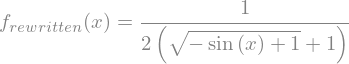

This means basically multiplying by a "convenient" 1. The convenient 1 in this case is the following:


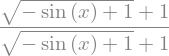

Now, for completeness, we substract both function:


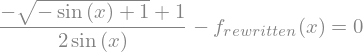

Since the outcome is zero, we can conclude that the function "f" is equivalent to "f_rewritten".


In [88]:
def fixing_evaluation_of_f(show=True):
    x, f = show_example_function(show=False)
    step1 = sym.simplify(f*(1+sym.sqrt(1-sym.sin(x)))) # type: ignore
    if show:
        print(textBold('Step 1: Multiplying by (1+sqrt(1-sin(x))) and simplify'))
        display(step1)
        print(textBold('Step 2: Now, divide by (1+sqrt(1-sin(x))). This means basically multiplying by 1 "convenient".'))
    step2 = sym.simplify(step1/(1+sym.sqrt(1-sym.sin(x)))) # type: ignore
    f_rewritten = sym.Function('f_rewritten', real=True)(x) # type: ignore
    if show:
        display(Eq(f_rewritten,step2,evaluate=False))
        print(textBoldH('This means basically multiplying by a "convenient" 1.')+textBold(' The convenient 1 in this case is the following:'))
        display(Mul(1+sym.sqrt(1-sym.sin(x)),Pow(1+sym.sqrt(1-sym.sin(x)),-1), evaluate=False)) # type: ignore
        print(textBold('Now, for completeness, we substract both function:')) # type: ignore
        display(Eq(f-f_rewritten,sym.simplify(f-step2),evaluate=False)) # type: ignore
        print(textBold('Since the outcome is zero,')+textBoldH(' we can conclude that the function "f" is equivalent to "f_rewritten".')) # type: ignore
    f_rewritten = step2
    return f_rewritten

fixing_evaluation_of_f();

In [ ]:
def show_cancelattion_errors_fixed(n_min=-100,log2_x_hat=-2):
    
    x, f = show_example_function(show=False)
    f_numpy = sym.lambdify(x, f, modules='numpy') # type: ignore
    x_vals = np.logspace(n_min, 0, 1-n_min, base=2)
    f_rewritten = fixing_evaluation_of_f(show=False)
    
    plt.figure(figsize=(fig_size_length/2, fig_size_length/2))
    f_rewritten_numpy = sym.lambdify(x, f_rewritten, modules='numpy') # type: ignore
    plt.loglog(x_vals, f_numpy(x_vals), 'd', label=r'$f(x)=\displaystyle\frac{1-\sqrt{1-\sin(x)}}{2\,\sin(x)}$', color='red', base=2, alpha=0.5)
    plt.loglog(x_vals, f_rewritten_numpy(x_vals), '.', label=r'$f_{\textrm{rewritten}}(x)='+latex(sym.N(f_rewritten))+'$', color='blue', base=2, alpha=0.5, markersize=10)
    plt.grid(True)
    plt.ylim(2**-3, 1)
    plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
    plt.xlabel(r'$x$', fontsize=FS)
    
    plt.vlines(np.power(2.,log2_x_hat),np.power(2.,-2.5), np.power(2.,0), color='orange', linestyle='--', linewidth=2)
    plt.text(np.power(2.,log2_x_hat), np.power(2.,-2.7), r'$\widehat{x}$', fontsize=FS, ha='center', va='center')
    
    plt.title(r'$f(\widehat{x})=$'+f'${np.round(f_numpy(np.power(2.,log2_x_hat)),3)}$'+r', $f_{\textrm{rewritten}}(\widehat{x})=$'+f'${np.round(f_rewritten_numpy(np.power(2.,log2_x_hat)),3)}$', fontsize=FS, pad=20)
    plt.show()

n_min_widget=widgets.IntSlider(min=-1075, max=-10, step=1, value=-100, description='n_min')
log2_x_hat_widget=widgets.IntSlider(min=-100, max=-1, step=1, value=-10, description='log2_x_hat')
def update_log2_x_hat(*args):
    log2_x_hat_widget.min = n_min_widget.value
n_min_widget.observe(update_log2_x_hat, 'value')

interact(show_cancelattion_errors_fixed,n_min=n_min_widget, log2_x_hat=log2_x_hat_widget)

interactive(children=(IntSlider(value=-100, description='n_min', max=-10, min=-1075), IntSlider(value=-10, des…

<function __main__.show_cancelattion_errors_fixed(n_min=-100, log2_x_hat=-2)>

In [66]:
# symbolsToBeDeleted = ('x', 'f', 'f_rewritten', 'step1', 'step2')

# for local_sym_var in symbolsToBeDeleted:
#     try:
#         del(globals()[local_sym_var])
#         print(f"Variable {local_sym_var} deleted.")
#     except Exception as e:
#         print(f"Variable {local_sym_var} already deleted.")

# What else can I do with these trigonemetric functions? Find a root numerically!

A root of a function is a value $r$ such that $f(r)=0$.

In [90]:
# Just plotting the Cobweb diagram: https://en.wikipedia.org/wiki/Cobweb_plot
def cobweb(x,g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(fig_size_length/2,fig_size_length/2))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

# This code performs the fixed point iteration.
def fpi(g, x0, k, flag_cobweb=False, show_output_Table=True):
    # This is where we store all the approximation, 
    # this is technically not needed but we store them because we need them for the cobweb diagram at the end.
    x = np.empty(k+1)
    # Just starting the fixed point iteration from the 'initial guess'
    x[0] = x0
    # Initializing the error in NaN
    error_i = np.nan
    
    # Output table to store the numerical evolution of the algorithm
    output_table = []
    
    # Main loop
    for i in range(k):
        # Iteration
        x[i+1] = g(x[i])
        # Storing error from previous iteration
        error_iminus1 = error_i
        # Computing error for current iteration.
        # Notice that from the theory we need to compute e_i=|x_i-r|, i.e. we need the root 'r'
        # but we don't have it, so we approximate it by 'x_{i+1}'.
        error_i = abs(x[i]-x[i+1])
        if show_output_Table:
            output_table.append([i,x[i],x[i+1],error_i,error_i/error_iminus1,error_i/(error_iminus1**((1+np.sqrt(5))/2.)),error_i/(error_iminus1**2)])
    
    if show_output_Table:
        # Showing final output table
        columns    = ['$i$', '$x_i$', '$x_{i+1}$', '$e_i$', r'$\frac{e_i}{e_{i-1}}$', r'$\frac{e_i}{e_{i-1}^\alpha}$', r'$\frac{e_i}{e_{i-1}^2}$']
        df = pd.DataFrame(data=output_table, columns=columns)
        display(df)
    
    # Just showing cobweb if required
    if flag_cobweb:
        cobweb(x,g)
    return x[-1], x

In [92]:
g = lambda x: np.cos(x)
f = lambda x: x-g(x)

x0=2.**-4
out=optimize.root_scalar(f,x0=x0)
print(out)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 5
           root: 0.7390851332151607
         method: newton


In [69]:
r, xs = fpi(g, x0, 20, flag_cobweb=False)
print(r)

,$i$,$x_i$,$x_{i+1}$,$e_i$,$\frac{e_i}{e_{i-1}}$,$\frac{e_i}{e_{i-1}^\alpha}$,$\frac{e_i}{e_{i-1}^2}$
0,0,0.062500,0.998048,0.935548,NaN,NaN,NaN
1,1,0.998048,0.541944,0.456103,0.487526,0.508019,0.521113
2,2,0.541944,0.856707,0.314763,0.690114,1.121066,1.513065
3,3,0.856707,0.654929,0.201778,0.641048,1.309645,2.036604
4,4,0.654929,0.793091,0.138162,0.684721,1.841302,3.393434
5,5,0.793091,0.701646,0.091445,0.661867,2.249263,4.790520
6,6,0.701646,0.763781,0.062134,0.679474,2.979969,7.430424
7,7,0.763781,0.722226,0.041554,0.668782,3.724310,10.763459
8,8,0.722226,0.750336,0.028110,0.676454,4.830368,16.278772
9,9,0.750336,0.731460,0.018876,0.671515,6.105425,23.889141


0.7389388250792887


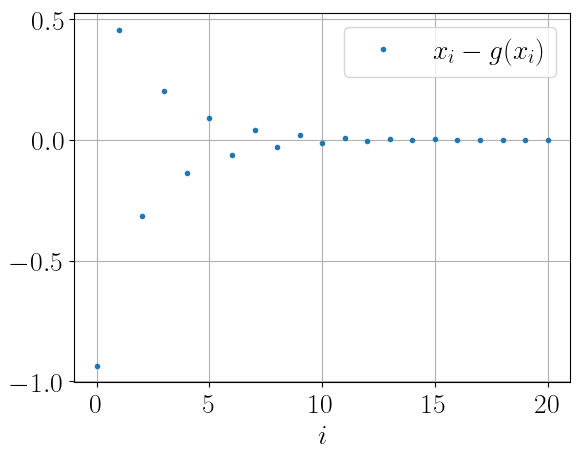

In [93]:
plt.plot(xs-g(xs),'.',label=r'$x_i-g(x_i)$')
plt.grid(True)
plt.xlabel(r'$i$')
plt.legend(loc='best') 

In [ ]:
def show_iterations(k=20, x0=2.**-4):
    r, xs = fpi(g, x0, k, flag_cobweb=False, show_output_Table=False)
    
    plt.figure(figsize=(3*fig_size_length/3, fig_size_length/2))
    
    plt.subplot(121)
    plt.plot(xs,'.',label=r'$x_i$')
    plt.grid(True)
    plt.xlabel(r'$i$')
    plt.legend(loc='best')
    plt.title(f'$r={np.round(r,8)}$')

    plt.subplot(122)
    plt.semilogy(np.abs(np.diff(xs)),'.',label=r'$|x_{i+1}-x_i|$')
    plt.grid(True)
    plt.xlabel(r'$i$')
    plt.legend(loc='best')

    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

interact_row(show_iterations, k=(10,150,1), x0=(-10,10,0.001))

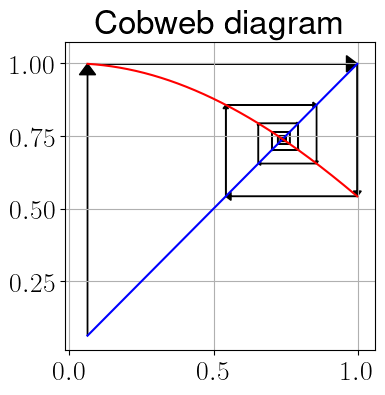

In [95]:
fpi(g, x0, 20, flag_cobweb=True, show_output_Table=False);

# Is there another way to build the trigonometric functions $\verb|sin(x)|$ and $\verb|cos(x)|$ using **elementals operations** ($\oplus$, $\ominus$, $\otimes$, and $\oslash$)? **An piecewise linear interpolation approach**

## We already built them with their Taylors' approximations. However, we can do something else. Interpolation!

In [ ]:
def show_cosine_interpolation_piecewise_linear(n_interp_points=7, flag_show_cos_continuous=False, 
                              show_cos_approximation=False, show_sin_approximation=False,
                              x_value=np.pi/4):
    x = np.linspace(0,2*np.pi,n_interp_points)
    xx = np.linspace(0,2*np.pi,700)
    
    # Piecewise linear interpolation
    piecewise_linear_sin = lambda z: np.interp(z, x, np.sin(x))
    piecewise_linear_cos = lambda z: np.interp(z, x, np.cos(x))
    
    ######################################################################
    plt.figure(figsize=(6*fig_size_length/4, 3*fig_size_length/4))
    ######################################################################
    plt.subplot(121)
    if flag_show_cos_continuous:
        plt.plot(xx, np.cos(xx), '-', label=r'$\cos(x)$', color='k', alpha=0.8)
    plt.plot(x, np.cos(x), 'o', color='blue', markersize=10, alpha=0.5)
    if show_cos_approximation:
        plt.plot(xx, piecewise_linear_cos(xx), '--', color='magenta', markersize=10, label='cos approx')
    if show_sin_approximation:
        plt.plot(xx, piecewise_linear_sin(xx), '--', color='green', markersize=10, label='sin approx')
        plt.plot(x, np.sin(x), 'o', color='green', markersize=10, alpha=0.5)
    plt.axis((-0.5, 2*np.pi+0.5, -1.5, 1.5))
    plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
    plt.grid(True)
    ######################################################################
    plt.subplot(122)
    only_circle_plot(x_value, theta_inf=0, theta_sup=2*np.pi, 
                    input_sin = piecewise_linear_sin,
                    input_cos = piecewise_linear_cos)
    plt.grid(True)
    ######################################################################
    if show_cos_approximation or show_sin_approximation:
        plt.subplot(121)
        plt.legend(loc='best', fontsize=10)
    plt.show()

interact_row(show_cosine_interpolation_piecewise_linear,
             n_interp_points=widgets.IntSlider(min=2, max=100, step=1, value=7, description='# of interpolation points'),
             x_value=widgets.FloatSlider(min=0, max=2*np.pi, step=6*np.pi/300, value=np.pi/4, description='x'))

# Building the polynomial interpolation by means of solving a linear system of equations? It requires to know the values of $\sin(x)$ and $\cos(x)$ at certain points

A tradictional form of a polynomial interpolation is as follows:
$$
\begin{align*}
    P_n(x)  & = \sum_{i=0}^n a_i\,x^i\\
            & = a_0+a_1\,x+a_2\,x^2+\dots a_n\,x^n.
\end{align*}
$$
So, the challenge is to obtain the coefficients $a_i$ from a given set the data points $(x_i,y_i)$ such that $y_i=P_n(x_i)$.

In [ ]:
def show_cosine_polynomial_interpolation(n_interp_points=7, flag_show_cos_continuous=False, 
                              show_cos_approximation=False, show_sin_approximation=False,
                              x_value=np.pi/4):
    x = np.linspace(0,2*np.pi,n_interp_points)
    xx = np.linspace(0,2*np.pi,700)
    
    # Polynomial interpolation using BarycentricInterpolator
    P_sin = BarycentricInterpolator(x, np.sin(x))
    P_cos = BarycentricInterpolator(x, np.cos(x))
    
    ######################################################################
    plt.figure(figsize=(6*fig_size_length/4, 3*fig_size_length/4))
    ######################################################################
    plt.subplot(121)
    if flag_show_cos_continuous:
        plt.plot(xx, np.cos(xx), '-', label=r'$\cos(x)$', color='k', alpha=0.8)
    plt.plot(x, np.cos(x), 'o', color='blue', markersize=10, alpha=0.5)
    if show_cos_approximation:
        plt.plot(xx, P_cos(xx), '--', color='magenta', markersize=10, label='cos approx')
    if show_sin_approximation:
        plt.plot(xx, P_sin(xx), '--', color='green', markersize=10, label='sin approx')
        plt.plot(x, np.sin(x), 'o', color='green', markersize=10, alpha=0.5)
    plt.axis((-0.5, 2*np.pi+0.5, -1.5, 1.5))
    plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
               [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
    plt.grid(True)
    ######################################################################
    plt.subplot(122)
    only_circle_plot(x_value, theta_inf=0, theta_sup=2*np.pi, 
                    input_sin=P_sin,
                    input_cos=P_cos)
    plt.grid(True)
    ######################################################################
    if show_cos_approximation or show_sin_approximation:
        plt.subplot(121)
        plt.legend(loc='best', fontsize=10)
    plt.show()

interact_row(show_cosine_polynomial_interpolation,
             n_interp_points=widgets.IntSlider(min=2, max=100, step=1, value=7, description='# of interpolation points'),
             x_value=widgets.FloatSlider(min=0, max=2*np.pi, step=6*np.pi/300, value=np.pi/4, description='x'))

# Adjusting a periodic but noisy signal

In [ ]:
def generate_pure_and_noisy_signals():
    rng = np.random.default_rng(12345)
    n_samples = 50
    x = np.linspace(0, 2*np.pi, n_samples)
    f_pure_signal = np.sin(x) + 0.3*np.cos(4*x)
    f_noisy_signal = f_pure_signal + 0.1 * rng.normal(size=n_samples)
    return f_pure_signal, f_noisy_signal, x
    
def show_signals(flag_pure_signal=True,flag_noisy_signal=False):
    f_pure_signal, f_noisy_signal, x = generate_pure_and_noisy_signals()

    if flag_pure_signal or flag_noisy_signal:
        plt.figure(figsize=(fig_size_length/2, fig_size_length/2))
        if flag_pure_signal:
            plt.plot(x, f_pure_signal, 'o', label=r'$\textrm{Pure signal}$', color='blue', markersize=4, alpha=0.5)
        if flag_noisy_signal:
            plt.plot(x, f_noisy_signal, 'o', label=r'$\textrm{Noisy signal}$', color='red', markersize=4, alpha=0.5)
        plt.grid(True)
        plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
        plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
                    [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
        plt.xlabel(r'$x$', fontsize=FS)
        plt.show()

interact_row(show_signals)

We will fit the following approximation, which generates a **linear system of equation** if we only pick two points:
$$
f_{\textrm{linear}} = a_0\,\sin(x)+b_0\,\cos(4\,x).
$$
For instance, if we pick the points $i$ and $j$ from the data, we get:


In [ ]:
def linear_fit_of_data(i,j, x_lim_sup=np.pi/4, show_noisy_signal=False, type_of_approximation='two_points', data_to_be_used='pure_signal'):
    f_pure_signal, f_noisy_signal, x = generate_pure_and_noisy_signals()
    
    if data_to_be_used == 'pure_signal':
        f_data = f_pure_signal
    else:
        f_data = f_noisy_signal 
    
    xi = x[i]
    xj = x[j]
    yi = f_data[i]
    yj = f_data[j]
    
    # Linear approximation
    f_linear = lambda a0,b0,x: a0*np.sin(x)+b0*np.cos(4*x)
    
    if type_of_approximation == 'two_points':
        # Matrix "A"
        A = np.array([[np.sin(xi), np.cos(4*xi)],
                    [np.sin(xj), np.cos(4*xj)]])
        # Vector "b"
        b = np.array([yi, yj])
        # Solve the linear system
        x_solution = np.linalg.solve(A, b)
        a0, b0 = x_solution
    else:
        A = np.array([np.sin(x), np.cos(4*x)]).T
        b = f_data
        x_solution_least_square = np.linalg.lstsq(A,b)[0]
        a0, b0 = x_solution_least_square
    
    xx = np.linspace(0, 2*np.pi, 500)
    
    ##################################################################################
    plt.figure(figsize=(fig_size_length, fig_size_length/2))
    plt.subplot(121)
    plt.plot(x[x<=x_lim_sup], f_pure_signal[x<=x_lim_sup], 'o', label=r'$\textrm{Pure signal}$', color='blue', markersize=4, alpha=0.5)
    plt.plot(xx[xx<=x_lim_sup], f_linear(a0, b0, xx[xx<=x_lim_sup]), label=r'$\textrm{Linear fit}$', color='magenta', linewidth=2, alpha=0.8)
    if show_noisy_signal:
        plt.plot(x[x<=x_lim_sup], f_noisy_signal[x<=x_lim_sup], 'o', label=r'$\textrm{Noisy signal}$', color='red', markersize=4, alpha=0.5)
    plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/8),
                [r'$0$', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$',
                 r'$\frac{5\pi}{8}$', r'$\frac{3\pi}{4}$', r'$\frac{7\pi}{8}$', r'$\pi$', 
                 r'$\frac{9\pi}{8}$', r'$\frac{5\pi}{4}$', r'$\frac{11\pi}{8}$', r'$1.5\pi$',
                 r'$\frac{13\pi}{8}$', r'$\frac{7\pi}{4}$', r'$\frac{15\pi}{8}$', r'$2\pi$'], fontsize=FS)
    plt.xlabel(r'$x$', fontsize=FS)
    plt.xlim(0, x_lim_sup)
    
    plt.vlines(xi, -2, 2, color='black', linestyle='--', linewidth=1)
    plt.plot(xi,yi, 'o', color='black', markersize=5, label=r'$x_i$')
    plt.vlines(xj, -2, 2, color='green', linestyle='--', linewidth=1)
    plt.plot(xj,yj, 'd', color='green', markersize=5, label=r'$x_j$')
    plt.ylim(-2,2)
    plt.grid(True)
    
    
    ##################################################################################
    plt.subplot(122)
    plt.plot(x, f_pure_signal, 'o', label=r'$\textrm{Pure signal}$', color='blue', markersize=4, alpha=0.5)
    if show_noisy_signal:
        plt.plot(x, f_noisy_signal, 'o', label=r'$\textrm{Noisy signal}$', color='red', markersize=4, alpha=0.5)
    
    plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/2),
                [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=FS)
    plt.xlabel(r'$x$', fontsize=FS)
    
    # Approximation
    plt.plot(xx, f_linear(a0, b0, xx), label=r'$\textrm{Linear fit}$', color='magenta', linewidth=2, alpha=0.8)
    
    plt.vlines(xi, -2, 2, color='black', linestyle='--', linewidth=1)
    plt.plot(xi,yi, 'o', color='black', markersize=5, label=r'$x_i$')
    plt.vlines(xj, -2, 2, color='green', linestyle='--', linewidth=1)
    plt.plot(xj,yj, 'd', color='green', markersize=5, label=r'$x_j$')
    
    rectangle=Rectangle((0, -2), x_lim_sup, 4, edgecolor='k', facecolor='none', linewidth=2,alpha=0.8)
    plt.gca().add_patch(rectangle)
    
    plt.ylim(-2,2)
    plt.grid(True)
    plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
    
    plt.show()
    
interact_row(linear_fit_of_data,
             x_lim_sup=widgets.FloatSlider(min=0, max=2*np.pi, step=6*np.pi/300, value=np.pi/4, description='x_lim_sup'),
             i=widgets.IntSlider(min=0, max=49, step=1, value=0, description='i'),
             j=widgets.IntSlider(min=0, max=49, step=1, value=1, description='j'),
             type_of_approximation=widgets.Dropdown(options=['two_points', 'all_data'], value='two_points', description='Type of approximation'),
             data_to_be_used=widgets.Dropdown(options=['pure_signal', 'noisy_signal'], value='pure_signal', description='Data to be used'))

# Integrating numerically functions that don't have anti-derivative using only **elementals operations**

We know that the function $\dfrac{\sin(x)}{x}$ does not have an anti-derivative, but we can take a look to it numerically!

In [106]:
f = lambda x: np.sin(x)/x
y_forbidden = integrate.quad(f, 0, 0.1)
print(y_forbidden[0])

0.09994446110827694


In [ ]:
def show_forbidden_anti_derivative(x_hat=1):
    f = lambda x: np.sinc(x/np.pi)
    
    n = 100
    x_int_domain = np.linspace(0,x_hat,n)
    
    y_forbidden = np.zeros(n)
    
    for i in np.arange(1,n):
        y_forbidden[i] = integrate.quad(f, 0, x_int_domain[i])[0]
    
    y_sinx_x = f(x_int_domain)
    
    plt.figure(figsize=(fig_size_length/2,fig_size_length/2))
    plt.plot(x_int_domain,y_forbidden,'r-', label=r'$\displaystyle\int_0^{\widehat{x}} \frac{\sin(x)}{x}\,\mathrm{d}x$')
    plt.plot(x_int_domain,y_sinx_x,'b-', label=r'$\displaystyle\frac{\sin(x)}{x}$')
    plt.grid(True)
    plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
    plt.xlabel(r'$x$')
    plt.show()

interact(show_forbidden_anti_derivative,x_hat=widgets.FloatSlider(min=0, max=4*np.pi, step=6*np.pi/300, value=1, description='x_hat'))

interactive(children=(FloatSlider(value=1.0, description='x_hat', max=12.566370614359172, step=0.0628318530717…

<function __main__.show_forbidden_anti_derivative(x_hat=1)>

# Finally, getting the approximated values of $\sin(x)$ and $\cos(x)$ using ODEs!

Consider the following diferential equation:
$$
\begin{align}
    \ddot{y}(t)+y(t)&=0,\quad t\in\left]0,2\,\pi\right],\\
    y(0) &= \alpha,\\
    \dot{y}(0) &= \beta,
\end{align}
$$
which has the following general solution:
$$
\begin{align*}
    y(t) &= \alpha\,\cos(t)+\beta\,\sin(t).
\end{align*}
$$
This means that if we solve this differential equation numerically, we will be getting $\sin(x)$ or $\cos(x)$ depending on how we set $\alpha$ and $\beta$.

In [ ]:
# Forward Euler Method
def eulerMethod_one_step(yi,ti,f,h):
    return yi+h*f(ti,yi)

def eulerMethod(t0,T,N,y0,f):
    t = np.linspace(t0,T,N+1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = eulerMethod_one_step(y[i],t[i],f,h)
    return t, y

def show_numerical_sin_cos(alpha=1,beta=0,T=1):
    # Defning f(t,y) for dynamical system
    f_ivp = lambda t,y: np.array([y[1],-y[0]])
    
    N = 50
    y0 = np.array([alpha,beta])
    
    # solve_ivp
    out = solve_ivp(f_ivp, [0,T], y0, t_eval=np.linspace(0,T,N+1))
    y_solve_ivp = out.y[0,:]
    t_solve_ivp  = out.t
    
    # Euler's method
    t_euler, y_euler = eulerMethod(0,T,N,y0,f_ivp)
    
    plt.figure(figsize=(fig_size_length/2,fig_size_length/2))
    plt.plot(t_solve_ivp,y_solve_ivp,'b.', label=r'Numericall $y(t)$ with solve_ivp')
    plt.plot(t_euler,y_euler[:,0],'rx', label=r"Numericall $y(t)$ with Euler's method")
    
    xx = np.linspace(0,np.max([2*np.pi,T]),1000)
    plt.plot(xx,np.cos(xx),'m-',label=r'$\cos(x)$')
    plt.plot(xx,np.sin(xx),'g-',label=r'$\sin(x)$')
    plt.grid(True)
    plt.legend(loc='center left', fontsize=FS, bbox_to_anchor=(1, 0.5))
    plt.show()

interact_row(show_numerical_sin_cos,alpha=(-1,1,0.1),beta=(-1,1,0.1),T=(0.1,4*np.pi+0.1,0.1))
    

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`claudio.torres@usm.cl`). v.1.00. DI UTFSM. August 2025._
* _Update August 2025 - v1.01 - C.Torres_ : Fixing title and removing extra cells.